<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Build Fast with AI](https://img.shields.io/badge/BuildFastWithAI-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://www.buildfastwithai.com/genai-course)
[![EduChain GitHub](https://img.shields.io/github/stars/satvik314/educhain?style=for-the-badge&logo=github&color=gold)](https://github.com/satvik314/educhain)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1vWerY41IN6-6yikxifwLRcufi6dUN1s-)
## Master Generative AI in 6 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community
Transform your AI ideas into reality through hands-on projects and expert mentorship.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)
*Empowering the Next Generation of AI Innovators

# Ell: The Language Model Programming Library


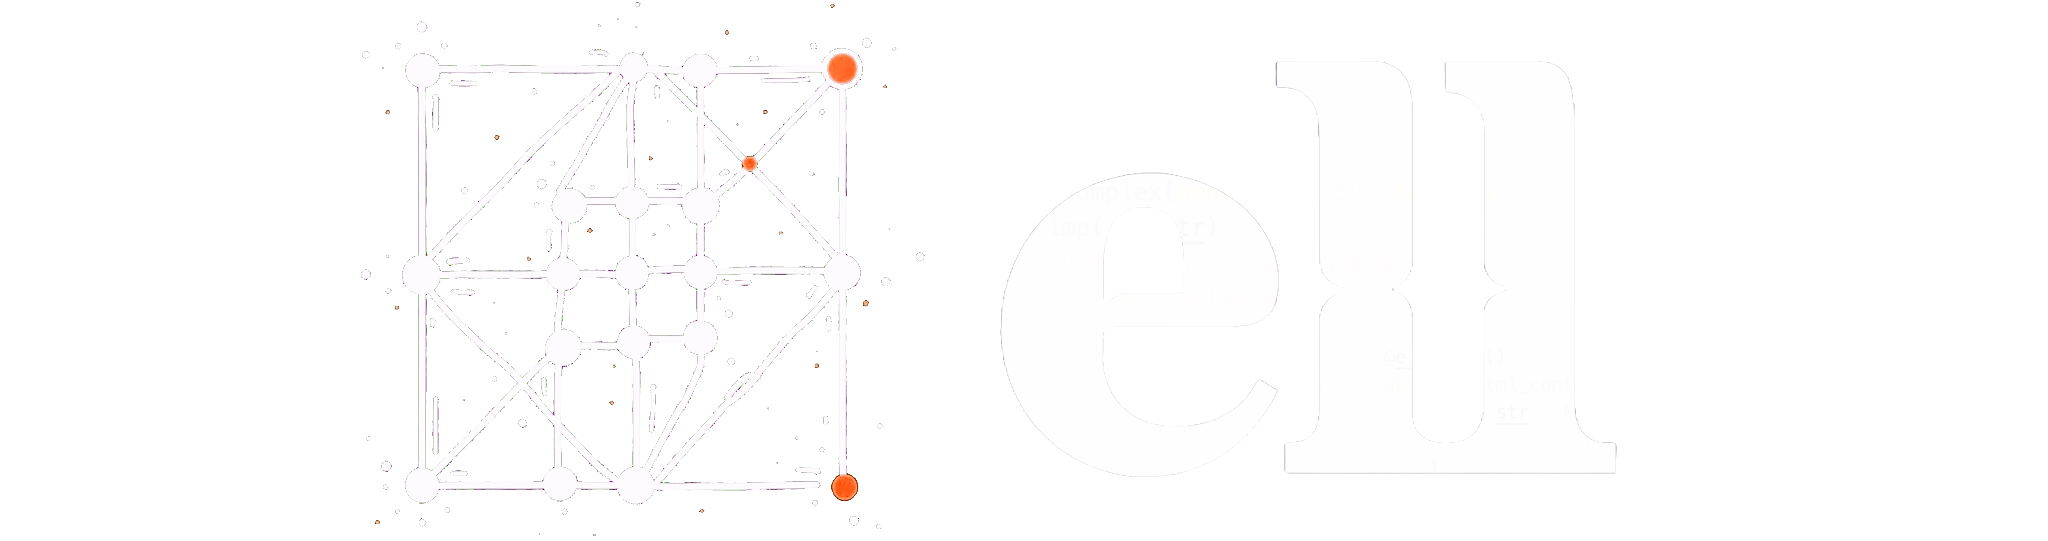

###<center>**ell is a lightweight prompt engineering library treating prompts as functions.**</center>

##Setup and Installation

Install Required Libraries




In [ ]:
!pip install -U "ell-ai[all]" openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.57.4
    Uninstalling openai-1.57.4:
      Successfully uninstalled openai-1.57.4


###**Configure API's**

In [ ]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

## Simple Usage (Greeting user)

In [ ]:
import ell

@ell.simple(model="gpt-4o")
def hello(name: str):
    """You are a helpful assistant.""" # System prompt
    return f"Say hello to {name}!" # User prompt

greeting = hello("Sam Altman")
print(greeting)

Hello, Sam Altman! How can I assist you today?


### Generating poem in 5 lines

In [ ]:
import ell

@ell.simple(model="gpt-4o")
def write_poem(name: str):
    """You are a Poet""" # System prompt
    return f"Write a poem for developer named: {name}!" # User prompt

print(write_poem("Sam Altman"))

In silicon's embrace, where dreams ignite,  
Stands a figure bold, a guiding light.  
Sam Altman, with vision clear and bright,  
Navigates the stars in the digital night.  

With each measured step, he charts the course,  
Harnessing the ever-flowing source.  
In realms where code and creativity entwine,  
He weaves the tapestry of future's design.  

From the whispers of ideas that softly spin,  
To the burgeoning apps that lie within,  
He turns the gears of innovation's song,  
Crafting worlds where minds and machines belong.  

Through trials where the shadows creep,  
He sows the seeds of dreams that leap.  
With wisdom's touch and courage's heart,  
He plays his role, a crucial part.  

For every byte and line of code he tends,  
He builds a bridge, where tomorrow extends,  
In the boundless sky where possibilities roam,  
Sam Altman crafts a visionary's home.  

So here's to the architect of tomorrow's way,  
Who ventures deep where the bold yet lay.  
With passion and purpose,

### Prompting as Language Model Programming

In [ ]:
import ell
import random

def get_random_adjective():
    adjectives = ["enthusiastic", "cheerful", "warm", "friendly"]
    return random.choice(adjectives)

@ell.simple(model="gpt-4o")
def hello(name: str):
    """You are a helpful assistant."""
    adjective = get_random_adjective()
    return f"Say a {adjective} hello to {name}!"

greeting = hello("Sam Altman")
print(greeting)

Hello, Sam Altman! I hope you're having a fantastic day. If there's anything you'd like to discuss or any questions you have, feel free to let me know!


### Generating Structured Output

In [ ]:
import ell
from pydantic import BaseModel, Field

class MovieReview(BaseModel):
    title: str = Field(description="The title of the movie")
    rating: int = Field(description="The rating of the movie out of 10")
    summary: str = Field(description="A brief summary of the movie")

@ell.complex(model="gpt-4o", response_format=MovieReview)
def generate_movie_review(movie: str):
    """You are a movie review generator. Given the name of a movie, you need to return a structured review."""
    return f"Generate a review for the movie {movie}"

review_message = generate_movie_review("The Matrix")
review = review_message.parsed
print(f"Movie: {review.title}, Rating: {review.rating}/10")
print(f"Summary: {review.summary}")

Movie: The Matrix, Rating: 9/10
Summary: The Matrix is a groundbreaking sci-fi action film directed by the Wachowskis, known for its innovative special effects, captivating story, and thought-provoking themes. Set in a dystopian future where reality is simulated by sentient machines to subdue the human population, the film follows the journey of Neo, played by Keanu Reeves, as he discovers the truth about his world and his role as 'The One' who is destined to end humanity's enslavement. The Matrix excels in its visual flair, with iconic action sequences that revolutionized the genre, including the famous 'bullet-dodging' scene. It is lauded for combining thrilling action with philosophical questions about reality, control, and free will, making it a film that resonates on multiple levels with audiences worldwide.


### Using inbuilt tool (`get_weather`) from ell

In [ ]:
@ell.tool()
def get_weather(location: str = Field(description="The full name of a city and country, e.g. San Francisco, CA, USA")):
    """Get the current weather for a given location."""
    # Simulated weather API call
    return f"The weather in {location} is sunny."

@ell.complex(model="gpt-4-turbo", tools=[get_weather])
def travel_planner(destination: str):
    """Plan a trip based on the destination and current weather."""
    return [
        ell.system("You are a travel planner. Use the weather tool to provide relevant advice."),
        ell.user(f"Plan a trip to {destination}")
    ]

result = travel_planner("Paris")
print(result.text)  # Prints travel advice
if result.tool_calls:
    # This is done so that we can pass the tool calls to the language model
    result_message = result.call_tools_and_collect_as_message()
    print("Weather info:", result_message.tool_results[0].text) # Raw text of the tool call.
    print("Message to be sent to the LLM:", result_message.text) # Representation of the message to be sent to the LLM.

To plan your trip to Paris, let's focus on a few key aspects:

1. **Weather:** Knowing the current weather will help us decide on the best time for your visit and what you should pack.
2. **Activities:** Based on the weather and your interests, I can suggest some activities and attractions.
3. **Accommodation:** Recommendations for where to stay according to your budget and preferences.
4. **Transportation:** Best options for getting around the city.
5. **Cuisine:** Must-try dishes and restaurant recommendations.

Let's start by checking the current weather in Paris to better plan your activities and what to pack. Please hold on while I fetch that information.
ToolCall(get_weather(location='Paris, France'), tool_call_id='call_smIckuXhISRTQGhOs52FaPdl')
Weather info: "The weather in Paris, France is sunny."
Message to be sent to the LLM: ToolResult(tool_call_id=call_smIckuXhISRTQGhOs52FaPdl, result="The weather in Paris, France is sunny.")
